Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Description of each column in the dataset:

show_id: A unique identifier for each show or movie.

type: The type of content, either "Movie" or "TV Show."

title: The title of the movie or TV show.

director: The director of the movie or TV show. In the first and third entries, this information is not available (NaN).

cast: The cast or actors in the movie or TV show. In the first entry, this information is not available (NaN). In the second entry, there is a list of actors from the TV show "Blood & Water."

country: The country where the movie or TV show was produced or is associated with.

date_added: The date when the content was added to the streaming platform, in the format "Month Day, Year."

release_year: The year the movie or TV show was originally released.

rating: The content's rating, which indicates the recommended audience age or maturity level (e.g., "PG-13" or "TV-MA").

duration: The duration of the movie or TV show. In the first entry, the duration is given in minutes ("90 min"). In the second and third entries, it's indicated in the number of seasons ("2 Seasons" and "1 Season").

listed_in: The genre or category of the content, which can help classify it (e.g., "Documentaries," "International TV Shows," "Crime TV Shows").

description: A brief description or synopsis of the movie or TV show, providing an overview of the plot or subject matter.



Here are the Questions:



1. Load the dataset and print the complete information of the dataset and name the columns that has missing values.
2. Load the dataset and print the top 10 countries contributing to the Content on Netflix
3. Load the dataset and list the 5 most popular types of genre on the platform
4. Load the Dataset and categorize into TV shows and Movies and display 2 rows for each.
5. Load the Dataset and find the Oldest movies
6. Load the Dataset and get the count of values for duration column.
7. Load the Dataset and find the measures of central tendency and dispersion of duration column by extracting  numerical part of the duration column.
8. Load the Dataset and find out to which country the highest duration movie belongs to by extracting the numerical part of the duration column and create a new column. print title and country column.
9. Load the Dataset and plot the histogram  on Netflix Content Release Year Distribution
10. Load the Dataset and plot the Distribution of Populartiy of different content categories using countplot

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/netflix_titles.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

1. Load the dataset and print the complete information of the dataset and name the columns that has missing values.

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


2. Load the dataset and print the top 10 countries contributing to the Content on Netflix

In [7]:
df['country'].value_counts().head(10)

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

3. Load the dataset and list the 5 most popular types of genre on the platform

In [8]:
ex_df = df.copy()
# Split the combined genres into separate rows
genres = ex_df['listed_in'].str.split(', ')

# Flatten the list of lists into a single list of genres
flat_list = [genre for sublist in genres.dropna() for genre in sublist]

# Create a new DataFrame from the flattened list
genres_df = pd.DataFrame(flat_list, columns=['listed_in'])

# Count the occurrences of each genre and display the top 5
top_genres = genres_df['listed_in'].value_counts().head(5)
print(top_genres)

International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
Name: listed_in, dtype: int64


4. Load the Dataset and categorize into TV shows and Movies and display 2 rows for each.

In [9]:
movie_df = df[df['type']== 'Movie']
movie_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [10]:
TV_Show_df = df[df['type']== 'TV Show']
TV_Show_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


5. Load the Dataset and find the Oldest movies

In [11]:
movie_df[movie_df['release_year'] == movie_df['release_year'].min()] ['title']

7790          Prelude to War
8205    The Battle of Midway
Name: title, dtype: object

6. Load the Dataset and get the count of values for duration column.

In [12]:
df['duration'].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

7. Load the Dataset and find the measures of central tendency and dispersion of duration column by extracting numerical part of the duration column.

In [13]:
df_copy = df.copy()
df_copy = df_copy.dropna(subset = ['duration'])
df_copy[['len','unit']] = df_copy['duration'].str.split(' ', expand=True)
df_copy['len'] = df_copy['len'].astype(int)
mean = df_copy['len'].mean()
max = df_copy['len'].max()
min = df_copy['len'].min()
var = df_copy['len'].var()
std = df_copy['len'].std()

print(f"The mean duration is {mean}")

The mean duration is 69.84688777828259


8. Load the Dataset and find out to which country the highest duration movie belongs to by extracting the numerical part of the duration column and create a new column. print title and country column.

In [14]:
condition = df_copy['len'].max()
result = df_copy.loc[df_copy['len'] == condition, ['title', 'country']]
print(result)

                           title        country
4253  Black Mirror: Bandersnatch  United States


9. Load the Dataset and plot the histogram on Netflix Content Release Year Distribution

In [15]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [16]:
df['release_year'].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [17]:
import plotly.express as px

fig = px.histogram(df, x = df['release_year'], nbins = 62)
fig.update_traces(marker=dict(line=dict(color='white', width=0.05)))

# Updating layout with title, x-axis, and y-axis labels
fig.update_layout(
    title={
        'text': 'Distribution of Release Years',
        'y': 0.95,  # Position the title in the middle
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 25, 'color': 'black'}  # Adjust size and change color of the title
    },
    xaxis_title='Release Year',
    yaxis_title='Count',
    width=1300,
    height=600,
    xaxis=dict(
        titlefont=dict(size=20, color='black'),  # Adjust size and change color of x-axis label
        tickfont=dict(size=15, color='black')    # Adjust size and color of x-axis tick labels
    ),
    yaxis=dict(
        titlefont=dict(size=20, color='black'),  # Adjust size and change color of y-axis label
        tickfont=dict(size=15, color='black')    # Adjust size and color of y-axis tick labels
    )
)
fig.show()

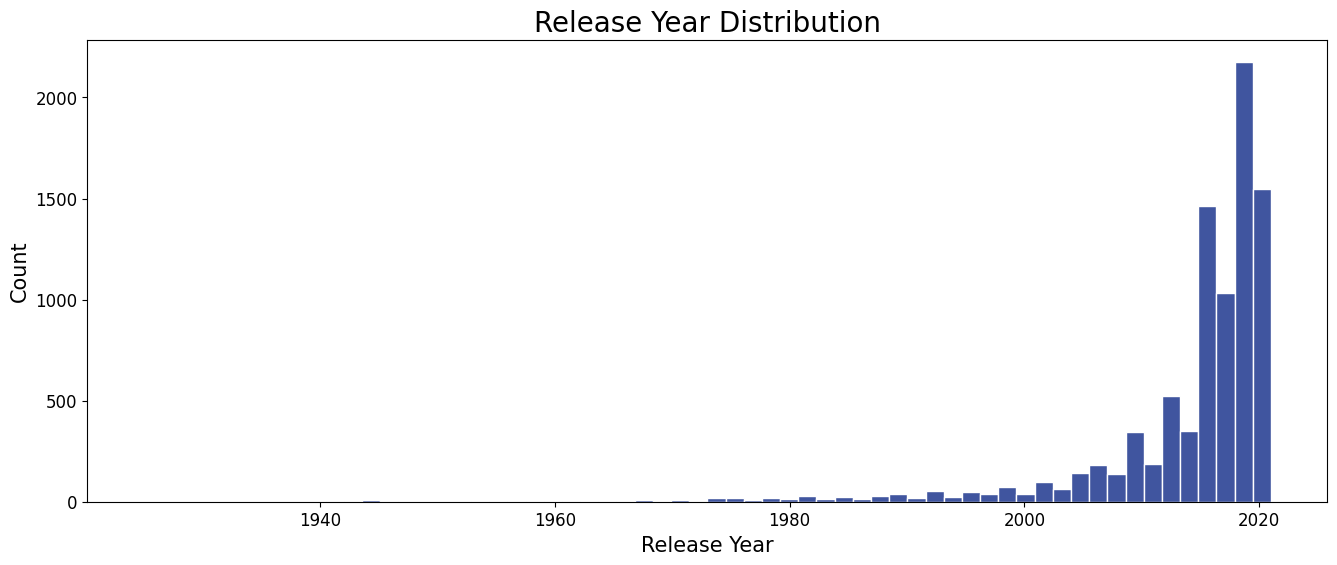

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-dark-palette')
plt.figure(figsize=(16,6))
sns.histplot(df['release_year'],bins = 62, edgecolor= 'white')

plt.title('Release Year Distribution',color = 'black', fontsize = 20) # for showing and editing the title
plt.xlabel('Release Year',color = 'black', fontsize = 15) # for editing x axis label its color and size
plt.ylabel('Count',color = 'black', fontsize = 15) # for editing y axis label its color and size
plt.tick_params(axis='x',labelcolor = 'black', labelsize=12) # for editing x axis scale points its color and size
plt.tick_params(axis='y',labelcolor = 'black', labelsize=12) # for editing y axis scale points its color and size

plt.show()

10. Load the Dataset and plot the Distribution of Populartiy of different content categories using countplot

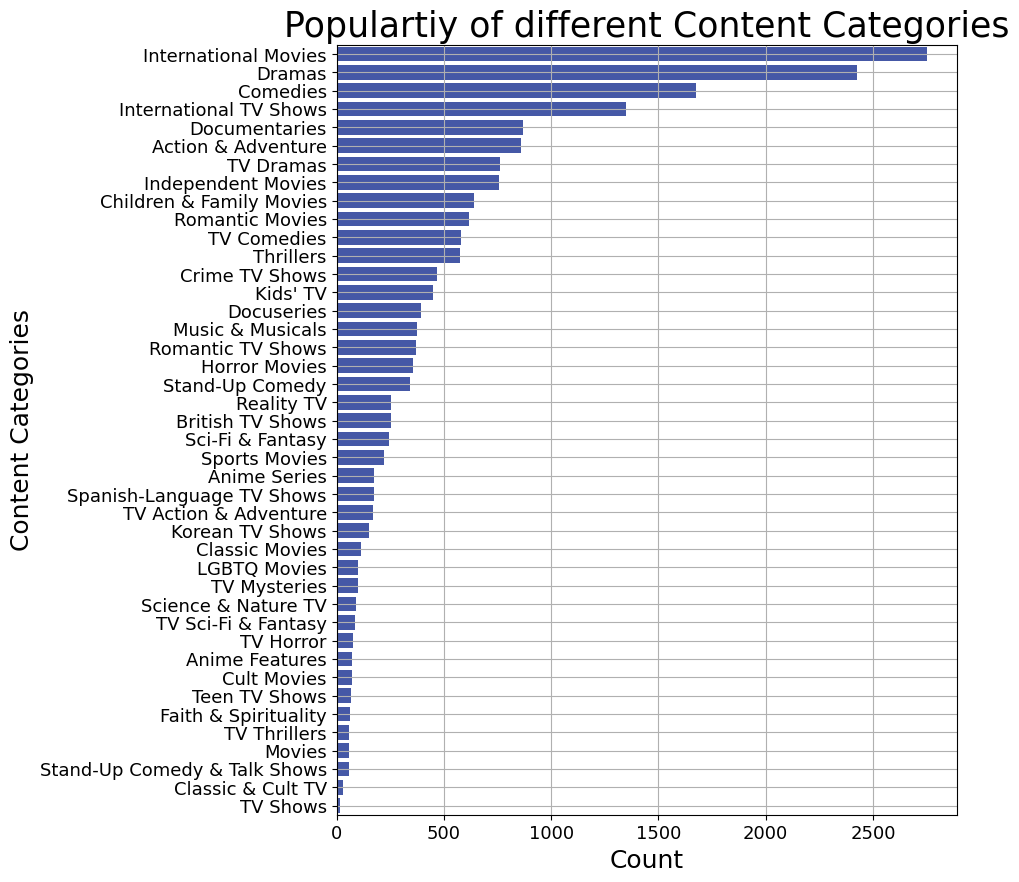

In [19]:
ex_df = df.copy()
# Split the combined genres into separate rows
genres = ex_df['listed_in'].str.split(', ')

# Flatten the list of lists into a single list of genres
flat_list = [genre for sublist in genres.dropna() for genre in sublist]

# Create a new DataFrame from the flattened list
genres_df = pd.DataFrame(flat_list, columns=['listed_in'])

plt.figure(figsize = (8,10))
sns.countplot(data=genres_df, y='listed_in', color = '#354EB6', order=genres_df['listed_in'].value_counts().index)


plt.grid(True) # for showing the grids in the output
plt.title('Populartiy of different Content Categories',color = 'black', fontsize = 25) # for showing and editing the title
plt.xlabel('Count',color = 'black', fontsize = 18) # for editing x axis label its color and size
plt.ylabel('Content Categories',color = 'black', fontsize = 18) # for editing y axis label its color and size
plt.tick_params(axis='x',labelcolor = 'black', labelsize=13) # for editing x axis scale points its color and size
plt.tick_params(axis='y',labelcolor = 'black', labelsize=13) # for editing y axis scale points its color and size
plt.show()

In [20]:
import plotly.express as px
import pandas as pd

# Grouping the data by 'listed_in' and counting occurrences
category_counts = genres_df['listed_in'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Creating the count plot using Plotly Express bar chart
fig = px.bar(category_counts, x='Category', y='Count',
             title='Distribution of Popularity by Content Category',
             labels={'Category': 'Content Category', 'Count': 'Count'})
#fig.update_layout(xaxis={'categoryorder':'total descending'})  # Sort bars by count

# Updating layout with title, x-axis, and y-axis labels
fig.update_layout(
    title={
        'text': 'Populartiy of different Content Categories',
        'y': 0.95,  # Position the title in the middle
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 25, 'color': 'black'}  # Adjust size and change color of the title
    },
    xaxis_title='Content Categories',
    yaxis_title='Count',
    width=1300,
    height=700,
    xaxis=dict(
        titlefont=dict(size=20, color='black'),  # Adjust size and change color of x-axis label
        tickfont=dict(size=15, color='black')    # Adjust size and color of x-axis tick labels
    ),
    yaxis=dict(
        titlefont=dict(size=20, color='black'),  # Adjust size and change color of y-axis label
        tickfont=dict(size=15, color='black')    # Adjust size and color of y-axis tick labels
    )
)

# Show the plot
fig.show()


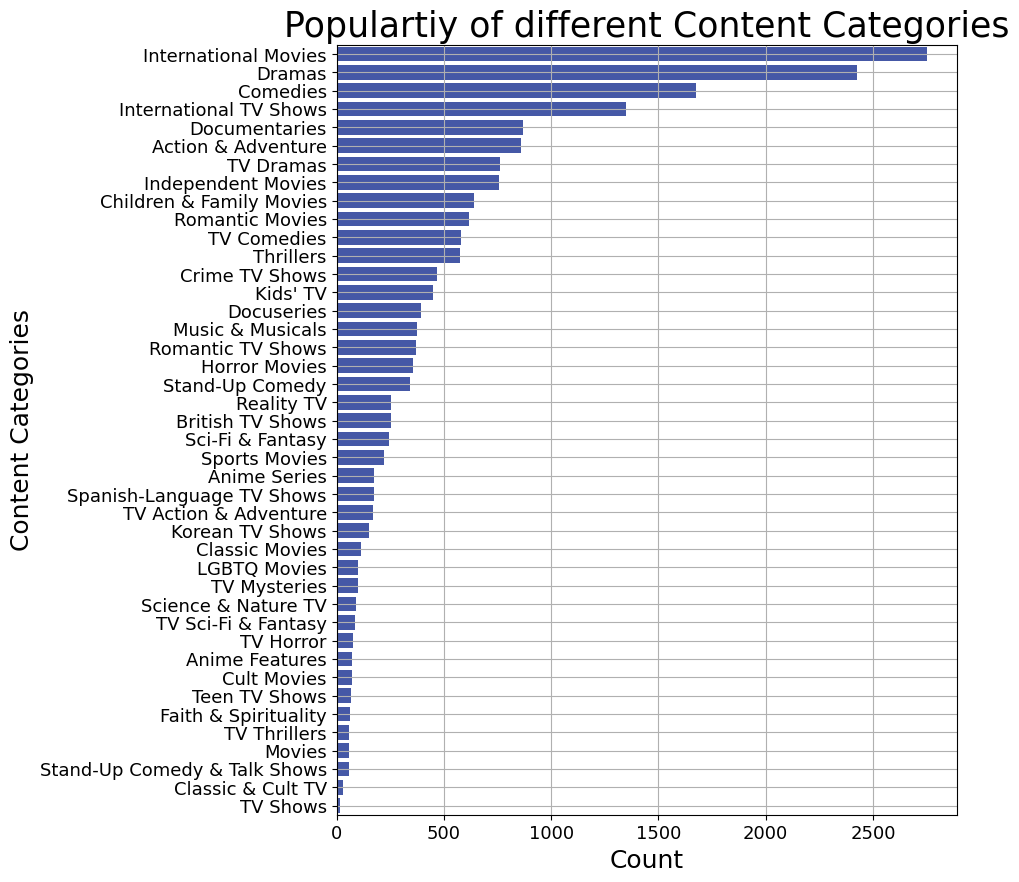

In [21]:
import pandas as pd # importing pandas library

df = pd.read_csv("/content/netflix_titles.csv")  # reading the csv file and storing it into df

ex_df = df.copy()  # creating copy of the data set and storing into ex_df
genres = ex_df['listed_in'].str.split(', ')  # Split the combined genres into separate rows

flat_list = [genre for sublist in genres.dropna() for genre in sublist] # flatten the list of lists into a single list of genres

genres_df = pd.DataFrame(flat_list, columns=['listed_in']) # Creating a new DataFrame from the flattened list

plt.figure(figsize = (8,10)) # adjusting the size of figure
sns.countplot(data=genres_df, y='listed_in', color = '#354EB6', order=genres_df['listed_in'].value_counts().index) # plotting the countplot

plt.grid(True) # for showing the grids in the output
plt.title('Populartiy of different Content Categories',color = 'black', fontsize = 25) # for showing and editing the title
plt.xlabel('Count',color = 'black', fontsize = 18) # for editing x axis label its color and size
plt.ylabel('Content Categories',color = 'black', fontsize = 18) # for editing y axis label its color and size
plt.tick_params(axis='x',labelcolor = 'black', labelsize=13) # for editing x axis scale points its color and size
plt.tick_params(axis='y',labelcolor = 'black', labelsize=13) # for editing y axis scale points its color and size

plt.show() # showing the graph


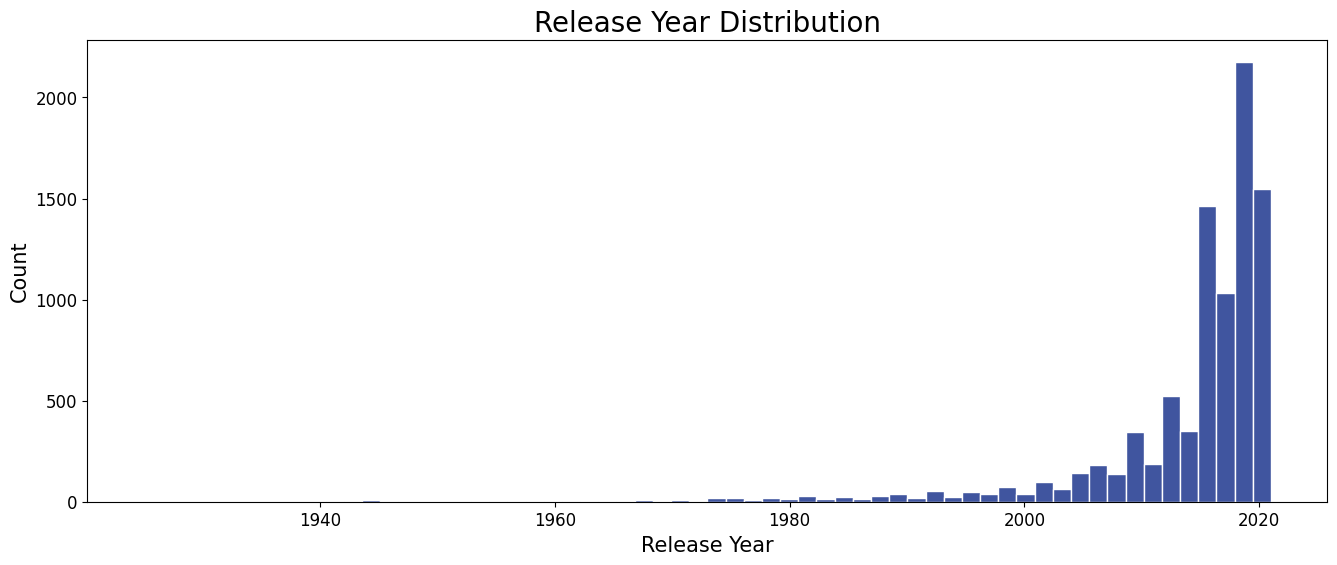

In [22]:
# importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/netflix_titles.csv") # reading the csv file and storing it into df

plt.style.use('seaborn-v0_8-dark-palette') # changing the chart style
plt.figure(figsize=(16,6)) # adjusting the figure size

sns.histplot(df['release_year'],bins = 62, edgecolor= 'white') # plotting the distribution

plt.title('Release Year Distribution',color = 'black', fontsize = 20) # for showing and editing the title
plt.xlabel('Release Year',color = 'black', fontsize = 15) # for editing x axis label its color and size
plt.ylabel('Count',color = 'black', fontsize = 15) # for editing y axis label its color and size
plt.tick_params(axis='x',labelcolor = 'black', labelsize=12) # for editing x axis scale points its color and size
plt.tick_params(axis='y',labelcolor = 'black', labelsize=12) # for editing y axis scale points its color and size

plt.show() # showing the graph
